# Homework assignment 4 - Classification

## Before you begin

Remember to:

1. Make your own copy of the notebook by pressing the "Copy to drive" button.
2. Expend all cells by pressing **Ctrl+[**

## Tip of the day - Displaying functions documentation

You can quickly display a function's documentation by pressing **Alt+/** when standing on it with the cursor.

You can also open a small documentation window at the bottom of the screen by running a command for the format of **?{function}** in a new cell (and replacing **{function}** with your function's name.

Try opening a new cell, bellow this one by clicking on the **+code** button below the menu bar. Then type:
```python
?print
```
into it and run it.

You would need to use the functions' full call string. For example, to view the documentation of the **randint** function in the numpy package, you will have to run *?np.random.randint*. You can, of course, only view the documentation for this function after importing the numpy library (i.e., after running *import numpy as np*)

### Your IDs

✍️ Fill in your IDs in the cell below:

In [1]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
## Fill in your IDs (as a string)
student1_id = '205736986'
student2_id = '316315407'
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

print('Hello ' + student1_id + ' & ' + student2_id)

Hello 205736986 & 316315407


In [2]:
?print

### Importing Packages

Importing the NumPy, Pandas and Matplotlib packages.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## This line makes matplotlib plot the figures inside the notebook
%matplotlib inline

## Set some default values of the the matplotlib plots
plt.rcParams['figure.figsize'] = (8.0, 8.0)  # Set default plot's sizes
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## Digits Dataset

For this task, we will use a dataset of 1797 digits collected from 43 people. Each digit is an image of 8x8 pixels taking integer values between 0 and 16. More details about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits). 

To load the data, we will use the scikit-learn's function [sklearn.datasets.load_digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).

Number of images in the dataset: 1797
Each images size is: (8, 8)
These are the first 80 images:


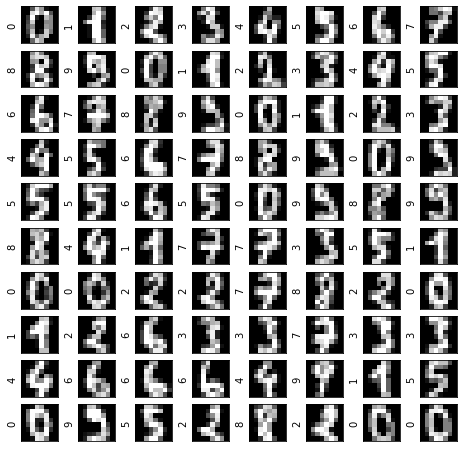

In [4]:
from sklearn.datasets import load_digits
dataset = load_digits()

x = dataset.images
y = dataset.target

print('Number of images in the dataset: {}'.format(len(x)))
print('Each images size is: {}'.format(x.shape[1:]))
print('These are the first 80 images:')

fig, ax_array = plt.subplots(10, 8)
for i, ax in enumerate(ax_array.flat):
    ax.imshow(x[i], cmap='gray')
    ax.set_ylabel(y[i])
    ax.set_yticks([])
    ax.set_xticks([])

## Train-Validation-Test split

✍️ Complete the code below to split the data into 60% train 20% validation set set and 20% test set

In [5]:
n_samples = x.shape[0]  # The total number of samples in the dataset

## Generate a random generator with a fixed seed
rand_gen = np.random.RandomState(0)

## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
## Generating a shuffled vector of indices
indices = np.arange(n_samples)
rand_gen.shuffle(indices)

## Split the indices into 60% train / 20% validation / 20% test
n_samples_train= int(n_samples * 0.8)
n_samples_val = int(n_samples_train * 0.2)
train_full_indices = indices[:n_samples_train]
train_indices=train_full_indices[n_samples_val:-1]
val_indices = train_full_indices[:n_samples_val]
test_indices = indices[n_samples_train:-1]
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

## Extract the sub datasets from the full dataset using the calculated indices
x_train = x[train_indices]
y_train = y[train_indices]
x_val = x[val_indices]
y_val = y[val_indices]
x_test = x[test_indices]
y_test = y[test_indices]

## The task

Our task here is to be able to predict the correct label (name of the person) given an image of his face. Formally, we would like to find a classifier $h(\boldsymbol{x})$, which would minimize the misclassification rate:
$$
R\{h\}=E\left[I\{h(\boldsymbol{x})\neq y\}\right]
$$

Here $\boldsymbol{x}$ is the measured data, which is in our case the images, and $y$ is the label of the image.

✍️ Complete the code below so that it will compute the misclassification rate of a given predictor on a given dataset.

In [6]:
def calc_score(h_func, x, y):
    """
    Calculates the misclassification rate of a predictor on a given dataset.

    Using:
    - N: the number of samples in the dataset.
    - ImageSize: the size of the image (in our case 8x8).

    Parameters
    ----------
    h_func: a function
        The prediction function which recived an input x and produces a prediction y_hat
    x: ndarray
        The NxImageSize array of the features of the dataset.
    y: ndarray
        The 1D array of length N of the labels of the dataset.
    
    Returns
    -------
    score: scalar
        The evaluated score on the dataset.
    """

    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    y_hat = h_func(x)
    score = np.mean(y_hat!=y)
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
    return score

## Test the function on a prediction function which always output 1
h_func = lambda x: np.ones(x.shape[0], dtype=int)

print(f'The score on the test set is: {calc_score(h_func, x_test, y_test):.4f}')

The score on the test set is: 0.9025


## 1-NN Classification

Lets us now try to classify the images using 1-nearest neighbor (1-NN). 

✍️ Complete the following code to implement the 1-NN classification.

- Use the [cdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html) function, which we encountered in the last assignment, to calculate the matrix of all distances between two sets of vectors.

The score on the validation set is: 0.0139


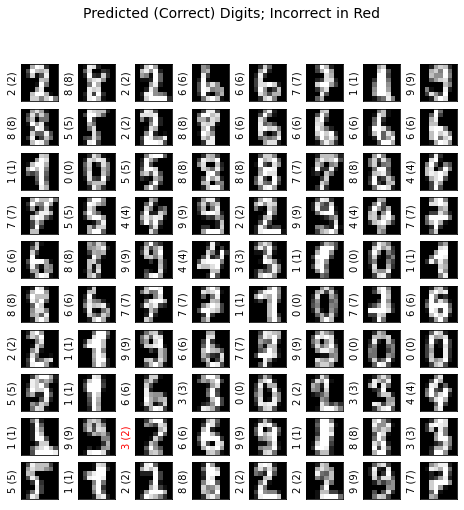

In [7]:
from scipy.spatial.distance import cdist

def one_nn(x, x_train, y_train):
    """
    Calculates the estimated labels for a given set of features using the 1-NN method. 

    Using:
    - N: the number of samples in the train set.
    - M: the number of samples for which the labels are to be estimated.
    - ImageSize: the size of the image (in our case 8x8).
   
    Parameters
    ----------
    x: ndarray
        The MxImageSize 2D array of features for which the labels are to be estimated.
    x_train: ndarray
        The NxImageSize 2D array of the features of the train set.
    y_train: ndarray
        The 1D array of length N of the labels of the train set.
    
    Returns
    -------
    y_hat: ndarray
        The 1D array of length M of the estimated labels.
    """
    
    x = x.reshape(x.shape[0], -1)
    x_train = x_train.reshape(x_train.shape[0], -1)

    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    dists = cdist(x,x_train)
    y_hat = y_train[np.argmin(dists, axis=1)]
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

    return y_hat

## Define a prediction function
h_func = lambda x: one_nn(x, x_train, y_train)

## Calcualte the score on the validation set
print(f'The score on the validation set is: {calc_score(h_func, x_val, y_val):.4f}')

## Plot the prediction
fig, ax_array = plt.subplots(10, 8)
for i, ax in enumerate(ax_array.flat):
    ax.imshow(x_val[i], cmap='gray')
    ax.set_yticks([])
    ax.set_xticks([])
    y_hat = h_func(x_val[i:(i+1)])[0]
    ax.set_ylabel(f'{y_hat} ({y_val[i]})',
                     color='black' if y_hat == y_val[i] else 'red')
fig.suptitle('Predicted (Correct) Digits; Incorrect in Red', size=14);

You should get a score of below 5% on the validation set.

## sklearn.neighbors.KNeighborsClassifier

The class [sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) implements the K-NN algorithm.

✍️ Read the function's documentation and fill in the following code run 1-NN using scikit-learn's class.

- You will need to reshape the data from Nx8x8 to Nx64.

In [8]:
from sklearn.neighbors import KNeighborsClassifier

## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(np.reshape(x_train, [x_train.shape[0], 64]), y_train)
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

h_func = lambda x: classifier.predict(x.reshape(x.shape[0], -1))

print(f'The score on the validation set is: {calc_score(h_func, x_val, y_val):.4f}')

The score on the validation set is: 0.0139


You should get more or less the same score as you got before.

## Selecting K

We will use the validation set to select K.

✍️ Complete the following code to calculate the model's score on the train set and the validation set for each value of K in the given list of Ks:

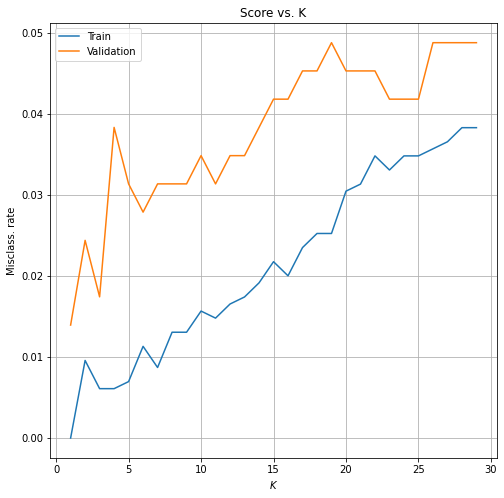

In [9]:
k_values = np.arange(1, 30)

train_scores = {}
val_scores = {}

for k in k_values:
    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(np.reshape(x_train, [x_train.shape[0], 64]), y_train)
    h_func = lambda x: classifier.predict(x.reshape(x.shape[0], -1))

    train_scores[k] = calc_score(h_func, x_train, y_train)
    val_scores[k] = calc_score(h_func, x_val, y_val)
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

fig, ax = plt.subplots()
ax.plot(list(train_scores.keys()), list(train_scores.values()), label='Train')
ax.plot(list(val_scores.keys()), list(val_scores.values()), label='Validation')
ax.set_ylabel('Misclass. rate')
ax.set_xlabel('$K$')
ax.set_title('Score vs. K')
ax.legend();

The following code selects the K which produces the minimal score in the validation and calculates the score for K-NN with the selected K.

In [10]:
best_k = min(val_scores.keys(), key=val_scores.get)
print(f'The best K is: {best_k}, with a validation score of {val_scores[best_k]:.4f}')

The best K is: 1, with a validation score of 0.0139


Depending on the way you have splitted the data you can get different Ks but it should be relatively small.

## LDA

We will now try to use linear discrimination analysis (LDA) method.

✍️ Fill in the code below to create an LDA class which can train a model and use it to make predictions.

- Reminder, the model's parameters are:
  - The mean values for each class
  - The covariance matrix for all classes.
  - The prior distribution of each class.
- The optimal prediction for the misclassification rate is:
  $$
  h(\boldsymbol{x})=\underset{y}{\arg\max}\ p_{\mathbf{x}|\text{y}}(\boldsymbol{x}|y)p_{\text{y}}(y)
  $$
  - *Optional*: The term $\left(\boldsymbol{x}-\boldsymbol{\mu}\right)^T\Sigma^{-1}\left(\boldsymbol{x}-\boldsymbol{\mu}\right)$, which appears in $p\left(\boldsymbol{x}|y\right)$, is called the [Mahalanobis distance](https://en.wikipedia.org/wiki/Mahalanobis_distance) between $\boldsymbol{x}$ and $\boldsymbol{\mu}$ based on the covariance matrix $\Sigma$. You can use the **cdist** function to calculate all the Mahalanobis distances between a set of $\boldsymbol{x}$'s and a set of $\boldsymbol{\mu}$'s. This can be done using the **'mahalanobis'** metric and adding a **VI = $\Sigma^{-1}$** arguments to the **cdist** function.

The score on the validation set is: 0.0592


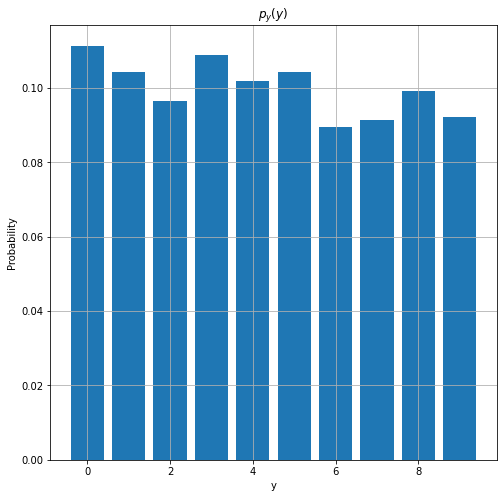

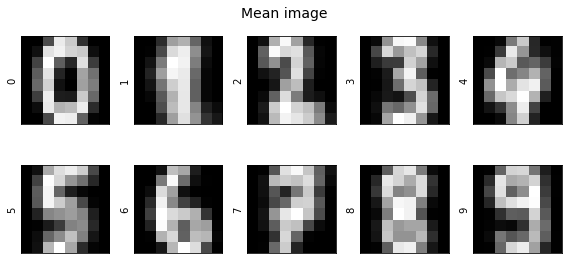

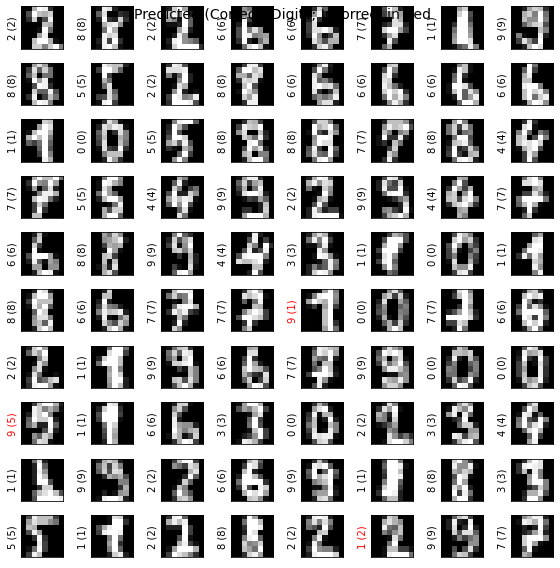

In [15]:
class LDA:
    def __init__(self, n_classes=10):
        """
        Initizaling the class fields.
        
        Using:
        - C: the number or classes.
        - ImageSize: the size of the image (in our case 8x8).
        - D: the dimension of the input (64).
        """
        self.n_classes = n_classes  # C: The number of classes (digits).
        
        ## These fields are initizalized with None and then learned in the fit method.
        self.py = None  # The prior distribution on y.
        self.mu = None  # An CxD matirx contating the mean value vecor for each class.
        self.cov_mat = None  # The covaraince matrix of the Gaussian for all the classes
    
    def fit(self, x, y):
        """
        Calculates the parameters of the LDA model. 

        Using:
        - C: the number of classes.
        - N: the number of samples in x.
        - ImageSize: the size of the image (in our case 8x8).

        Parameters
        ----------
        x: ndarray
            The NxImageSize 2D array of features the train set.
        y: ndarray
            The 1D array of length N of the labels of the train set.
        """
        ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
        x = x.reshape(x.shape[0], -1)
        self.py = np.bincount(y)/y.shape[0]
        self.mu = np.array([np.mean(x[y==i], axis=0) for i in range(self.n_classes)])
        mat = np.zeros(x.shape)
        for i in range(x.shape[0]):
          mat[i] = x[i]-self.mu[y[i]]
        self.cov_mat = mat.T@mat/x.shape[0]
        ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
    
    def predict(self, x):
        """
        Calculates the parameters of the LDA model. 

        Using:
        - C: the number of classes.
        - N: the number of samples in x.
        - ImageSize: the size of the image (in our case 8x8).

        Parameters
        ----------
        x: ndarray
            The NxImageSize 2D array of features for which the labels are to be estimated.

        Returns
        -------
        y_hat: ndarray
            The 1D array of length N of the estimated labels.
        """
        ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
        x = x.reshape(x.shape[0], -1)
        dist = cdist(x, self.mu, metric='mahalanobis', VI=np.linalg.pinv(self.cov_mat))
        y_hat = np.argmax(-0.5*np.power(dist,2)+np.log(self.py), axis=1)
        ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

        return y_hat

## Train the model on the train set
classifier = LDA()
classifier.fit(x_train, y_train)

## Define the prediction function
h_func = classifier.predict

## Plot P(y)
fig, ax = plt.subplots()
ax.bar(range(classifier.n_classes), classifier.py)
ax.set_title(r'$p_{{y}}(y)$')
ax.set_xlabel('y')
ax.set_ylabel('Probability')

## Display the means
fig, ax_array = plt.subplots(2, 5, figsize=(8.0, 4.0))
for i, ax in enumerate(ax_array.flat):
    img = classifier.mu[i].reshape(x_train.shape[1:])
    ax.imshow(img, cmap='gray')
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_ylabel(i)
fig.suptitle('Mean image', size=14);
fig.tight_layout()

## Calculate the model's score on the the validation set
print(f'The score on the validation set is: {calc_score(h_func, x_val, y_val):.4f}')

## Plot estimation
fig, ax_array = plt.subplots(10, 8)
for i, ax in enumerate(ax_array.flat):
    ax.imshow(x_val[i], cmap='gray')
    ax.set_yticks([])
    ax.set_xticks([])
    y_hat = h_func(x_val[i:(i+1)])[0]
    ax.set_ylabel(f'{y_hat} ({y_val[i]})',
                     color='black' if y_hat == y_val[i] else 'red')
fig.suptitle('Predicted (Correct) Digits; Incorrect in Red', size=14)
fig.tight_layout()

You should get a score of below 5% on the validation set.

## sklearn.discriminant_analysis.LinearDiscriminantAnalysis

The class [sklearn.discriminant_analysis.LinearDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) implements the LDA algorithm.

✍️ Read the function's documentation and fill in the following code run LDA using scikit-learn's class. 

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
classifier = LinearDiscriminantAnalysis()
classifier.fit(x_train.reshape(x_train.shape[0], -1),y_train)
h_func = lambda x: classifier.predict(x.reshape(x.shape[0], -1))
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

print(f'The score on the validation set is: {calc_score(h_func, x_val, y_val):.4f}')

The score on the validation set is: 0.0592


## Linear Logistic Regression

We will now try to use linear logistic regression:

$$
p_{\text{y}|\mathbf{x}}(y|\boldsymbol{x})=\frac{e^{\boldsymbol{x}^{\top}\boldsymbol{\theta}_{y}}}{\sum_c e^{\boldsymbol{x}^{\top}\boldsymbol{\theta}_{c}}}
$$

✍️ Fill in the code below to create an linear logistic regression class which can train a model and use it to make predictions.

- Reminder, the model's parameters are $C$ vectors $\boldsymbol{\theta}_c$ for each class of the.
- In practice the class stores the parameters in a single matrix $\Theta$ which contains all the $\boldsymbol{\theta}_c$ vectors:
  $$
  \Theta=
  \begin{bmatrix}
    |&|&&|\\
    \boldsymbol{\theta}_1&\boldsymbol{\theta}_2&\dots&\boldsymbol{\theta}_C\\
    |&|&&|\\
  \end{bmatrix}
  $$
- The parameters are learned by MLE (maximizing the log likelihood) using gradient descent.
- The optimal prediction for the misclassification rate is:
  $$
  h(\boldsymbol{x})=\underset{y}{\arg\max}\ p_{\text{y}|\mathbf{x}}(y|\boldsymbol{x})=\underset{y}{\arg\max}\ \boldsymbol{x}^{\top}\boldsymbol{\theta}_{y}
  $$
- You do not need to implement the method calculating the gradient of the log likelihood. The given calc_grad_log_likelihood implements following formula:
  $$
  \frac{1}{N}\nabla_{\Theta}\log(\mathcal{L})=
  \frac{1}{N}\sum_i \boldsymbol{x}^{(i)} \left(\boldsymbol{n}(y^{(i)})-\text{softmax}(\boldsymbol{x}^{(i)})^{\top}\right)
  $$
  where $\boldsymbol{n}(c)$ is a vector of zeros except of a 1 at the $c$ position (for example $\boldsymbol{n}(2)=[0,1,0,\dots,0]^{\top}$). (This is known as a one-hot representation).
- You also do not need to implement it but the methods add a columns of ones to $X$ in order to include a bias term in the model.

Text(0, 0.5, 'Objective')

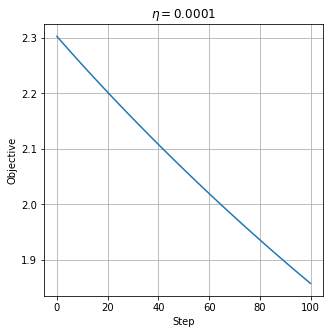

In [17]:
class LinearLogisticRegression:
    def __init__(self):
        """
        Initizaling the class fields.
        
        Using:
        - C: the number or classes.
        - ImageSize: the size of the image (in our case 8x8).
        - D: the dimension of the input (64).
        """
        
        ## These fields is initizalized with None and then learned in the fit method.
        self.theta = None  # A DxC matrix containing the C theta vectors.
    
    def calc_prob(self, x):
        """
        An auxiliary function for calcualting the probabilities of all classes for a given x.

        Using:
        - N: the number of samples in x.
        - D: the dimention of x (64)

        Parameters
        ----------
        x: ndarray
            The NxD 2D array of N vectors of x.

        Returns
        -------
        prob: ndarray
            A NxC 2D array of N probability vectors for each of the N vectors of x.
        
        Note
        ----
        This function should in fact calculate the softmax function for each row in x.
        """
        
        ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
        z = x @ self.theta
        prob = np.exp(z)/np.sum(np.exp(z), axis=1, keepdims=True)
        ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

        return prob

    def log_likelihood(self, x, y):
        """
        An auxiliary function for calcualting the log likelihood !!! divided by the number of samples !!!.

        Using:
        - N: the number of samples in x.
        - D: the dimention of x (64)

        Parameters
        ----------
        x: ndarray
            The NxD 2D array of N vectors of x.
        y: ndarray
            The 1D array of length N of the labels of the train set.

        Returns
        -------
        log_likelihood: float
            The log likelihood of the dataset divided by the number of samples.
        
        Note
        ----
        Use the calc_prob method.
        
        """

        ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
        prob = self.calc_prob(x)
        log_likelihood = np.sum(np.log(prob[range(len(y)),y]))/x.shape[0]
        ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
        return log_likelihood

    def calc_grad_log_likelihood(self, x, y):
        temp_mat = -self.calc_prob(x)
        temp_mat[np.arange(len(y)), y] += 1
        grad = x.T @ temp_mat / x.shape[0]
        return grad
        
    def fit(self, x, y, eta, n_iters):
        """
        Fitting the models parameters using gradient descent.

        Using:
        - N: the number of samples in x.
        - ImageSize: the size of the image (in our case 8x8).

        Parameters
        ----------
        x: ndarray
            The NxImageSize 2D array of features the train set.
        y: ndarray
            The 1D array of length N of the labels of the train set.
        eta: float
            The learning rate of the gradient descent algorithm.
        n_iters:
            The number of iterations in the gradent descent.

        Returns
        -------
        objective_list: ndarray
            A n_iters 1D array of the intermidiate values of the objective (the minus log-likelihood).
        """
        
        x = x.reshape(x.shape[0], -1)
        ## Add a column of ones to add a bias term
        x = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)

        ## Initialize theta
        self.theta = np.zeros((x.shape[1], y.max() + 1))

        ## Initialize lists to store intermidiate results for plotting
        objective_list = [-self.log_likelihood(x, y)]

        ## Perforing the update steps
        for i_iter in range(1, n_iters + 1):
            ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
            ## Update theta
            self.theta += eta * self.calc_grad_log_likelihood(x,y)
            ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

            ## Store intermidiate results
            objective_list.append(-self.log_likelihood(x, y))

        objective_list = np.array(objective_list)

        return objective_list

    def predict(self, x):
        """
        Calculate the prediction for a given set of x's

        Using:
        - N: the number of samples in x.
        - ImageSize: the size of the image (in our case 8x8).

        Parameters
        ----------
        x: ndarray
            The NxImageSize 2D array of N vectors of x's.

        Returns
        -------
        y_hat: ndarray
            A 1D array of N predictions for each of the N vectors of x.
        """
        
        x = x.reshape(x.shape[0], -1)
        x = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)
        
        ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
        y_hat = np.argmax(x@self.theta, axis=1)
        ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
        
        return y_hat

## Test the class
eta = 1e-4
n_iters = 100
classifier = LinearLogisticRegression()
objective_list = classifier.fit(x_train, y_train, eta, n_iters)

## Plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(np.arange(len(objective_list)), objective_list)
ax.set_title(r'$\eta={' + f'{eta:g}' + r'}$')
ax.set_xlabel('Step')
ax.set_ylabel('Objective')

You should see a graph of the objective starting at around 2.3 going down to about 1.9.

### Selecting the learning rate

In order to select the learning rate we will test 4 values of $\eta$ and plot the objective in the first 100 iterations. The following code does that.

<ipython-input-17-c00fcab2074c>:73: RuntimeWarning: divide by zero encountered in log
  log_likelihood = np.sum(np.log(prob[range(len(y)),y]))/x.shape[0]
<ipython-input-17-c00fcab2074c>:40: RuntimeWarning: overflow encountered in exp
  prob = np.exp(z)/np.sum(np.exp(z), axis=1, keepdims=True)
<ipython-input-17-c00fcab2074c>:40: RuntimeWarning: invalid value encountered in true_divide
  prob = np.exp(z)/np.sum(np.exp(z), axis=1, keepdims=True)


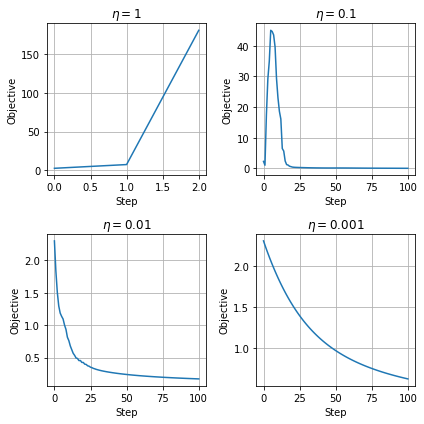

In [18]:
n_iters = 100
etas_list = (1e0, 1e-1, 1e-2, 1e-3)

fig, axes = plt.subplots(2, 2, figsize=(6, 6))
classifier = LinearLogisticRegression()
for i_eta, eta in enumerate(etas_list):
    objective_list = classifier.fit(x_train, y_train, eta, n_iters)

    ## Plot
    ax = axes.flat[i_eta]
    ax.plot(np.arange(len(objective_list)), objective_list)
    ax.set_title(r'$\eta={' + f'{eta:g}' + r'}$')
    ax.set_xlabel('Step')
    ax.set_ylabel('Objective')
fig.tight_layout()

Select the learning rate which monotonically decays (this criteria is relevant for the simple version of gradient 
of gradient descent implemented here, it is more complicated of more sophisticated versions of gradient descent).

✍️ Fill in the code below to select the learning rate and retrain the model for 50000 iterations.

- Running the code should take about 2 minutes

Text(0, 0.5, 'Objective')

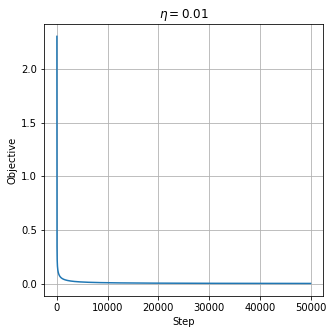

In [19]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
eta = 0.01
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

n_iters = 50000
classifier = LinearLogisticRegression()
objective_list = classifier.fit(x_train, y_train, eta, n_iters)

## Plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(np.arange(len(objective_list)), objective_list)
ax.set_title(r'$\eta={' + f'{eta:g}' + r'}$')
ax.set_xlabel('Step')
ax.set_ylabel('Objective')

### Evaluating the model

The score on the validation set is: 0.0488


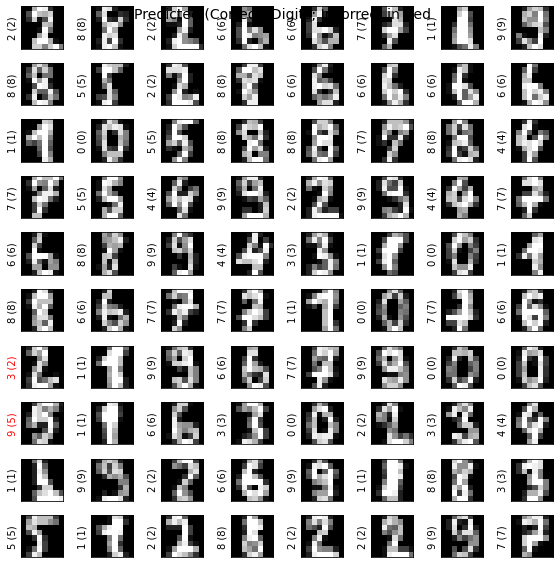

In [20]:
h_func = lambda x: classifier.predict(x)

print(f'The score on the validation set is: {calc_score(h_func, x_val, y_val):.4f}')

## Plot estimation
fig, ax_array = plt.subplots(10, 8)
for i, ax in enumerate(ax_array.flat):
    ax.imshow(x_val[i], cmap='gray')
    ax.set_yticks([])
    ax.set_xticks([])
    y_hat = h_func(x_val[i:(i+1)])[0]
    ax.set_ylabel(f'{y_hat} ({y_val[i]})',
                     color='black' if y_hat == y_val[i] else 'red')
fig.suptitle('Predicted (Correct) Digits; Incorrect in Red', size=14)
fig.tight_layout()

You should get a score of below 5% on the validation set.

## Selecting the best model

✍️ Copy the code which generates the prediction function with the best results in the validation set.

In [21]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
h_func = lambda x: one_nn(x, x_train, y_train)
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

print(f'The score on the validation set is: {calc_score(h_func, x_val, y_val):.4f}')
print(f'The score on the test set is: {calc_score(h_func, x_test, y_test):.4f}')

The score on the validation set is: 0.0139
The score on the test set is: 0.0167
